# Clustering Exploratory Analysis

<hr style="border:2px solid gray">

Sourcing the Zillow database as the data source, create a jupyter notebook named ``explore_zillow`` and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

<b>Bonus</b>:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [1]:
#standard ds imports
import numpy as np
import pandas as pd

#visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

#math/sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats

#custom imports
import acquire
import wrangle_zillow

#import to remove warnings
import warnings
warnings.filterwarnings('ignore')

<hr style="border:2px solid gray">

## Aquire/ Prepare

In [2]:
zillow_df = wrangle_zillow.wrangle_zillow()

In [3]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52781 entries, 0 to 52956
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_sqft      52781 non-null  float64
 1   bedrooms        52781 non-null  float64
 2   bathrooms       52781 non-null  float64
 3   value_assessed  52781 non-null  float64
 4   tax_amount      52781 non-null  float64
 5   year_built      52781 non-null  float64
 6   fips            52781 non-null  float64
 7   logerror        52781 non-null  float64
 8   latitude        52781 non-null  float64
 9   longitude       52781 non-null  float64
 10  parcelid        52781 non-null  int64  
 11  LA              52781 non-null  uint8  
 12  Orange          52781 non-null  uint8  
 13  Ventura         52781 non-null  uint8  
dtypes: float64(10), int64(1), uint8(3)
memory usage: 5.0 MB


In [4]:
zillow_df.head(3)

,total_sqft,bedrooms,bathrooms,value_assessed,tax_amount,year_built,fips,logerror,latitude,longitude,parcelid,LA,Orange,Ventura
0,3100.0,4.0,3.5,1023282.0,11013.72,1998.0,6059.0,0.025595,33634931.0,-117869207.0,14297519,0,1,0
1,1465.0,2.0,1.0,464000.0,5672.48,1967.0,6111.0,0.055619,34449266.0,-119281531.0,17052889,0,0,1
2,1243.0,3.0,2.0,564778.0,6488.30,1962.0,6059.0,0.005383,33886168.0,-117823170.0,14186244,0,1,0


In [5]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52781 entries, 0 to 52956
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_sqft      52781 non-null  float64
 1   bedrooms        52781 non-null  float64
 2   bathrooms       52781 non-null  float64
 3   value_assessed  52781 non-null  float64
 4   tax_amount      52781 non-null  float64
 5   year_built      52781 non-null  float64
 6   fips            52781 non-null  float64
 7   logerror        52781 non-null  float64
 8   latitude        52781 non-null  float64
 9   longitude       52781 non-null  float64
 10  parcelid        52781 non-null  int64  
 11  LA              52781 non-null  uint8  
 12  Orange          52781 non-null  uint8  
 13  Ventura         52781 non-null  uint8  
dtypes: float64(10), int64(1), uint8(3)
memory usage: 5.0 MB


In [6]:
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,52781.0,1.918456e+03,1.001397e+03,1.280000e+02,1.266000e+03,1.653000e+03,2.299000e+03,2.192900e+04
bedrooms,52781.0,3.298914e+00,9.442295e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
bathrooms,52781.0,2.300250e+00,1.017044e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
value_assessed,52781.0,5.262565e+05,7.465486e+05,1.000000e+03,1.933840e+05,3.712770e+05,6.150000e+05,4.906124e+07
tax_amount,52781.0,6.411064e+03,8.689335e+03,4.918000e+01,2.644130e+03,4.617900e+03,7.338410e+03,5.866393e+05
year_built,52781.0,1.963537e+03,2.310124e+01,1.878000e+03,1.950000e+03,1.961000e+03,1.979000e+03,2.016000e+03
fips,52781.0,6.049535e+03,2.156948e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
logerror,52781.0,1.850298e-02,1.773366e-01,-4.655420e+00,-2.459688e-02,7.082067e-03,4.085599e-02,5.262999e+00
latitude,52781.0,3.402479e+07,2.738537e+05,3.334062e+07,3.382844e+07,3.402860e+07,3.418939e+07,3.481877e+07
longitude,52781.0,-1.182002e+08,3.619705e+05,-1.194754e+08,-1.184054e+08,-1.181566e+08,-1.179314e+08,-1.175546e+08


In [7]:
#use zillow_split function from wrangle_zillow.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_zillow.zillow_split(zillow_df, 'logerror')

train -> (29556, 14)
validate -> (12668, 14)
test -> (10557, 14)


<hr style="border:1px solid black">

### #1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror.

<b>Questions:</b>
    
- <b>A</b>. Distribution of the independent variables
<br>
 
- <b>B</b>. Is the logerror significantly different for properties in LA County vs Orange County vs Ventura County
<br>
 
- <b>C</b>. Is there a relationship between logerror and total sqft of the property?
<br>
 
- <b>D</b>. Is there a relationship between latitude and logitude
<br>
 
- <b>E</b>. Accounting for bedroom counts, is there a relationship between logerror and lat/long.

<hr style="border:1px solid black">

### #2. Answer those questions through a mix of statistical tests and visualizations.

<b>A. Distribution of the independent variables </b>

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>
    
- take a look at the distributions to see if we should bin anything 
<br>
    
- there could be some visual relationships between the data
</div>

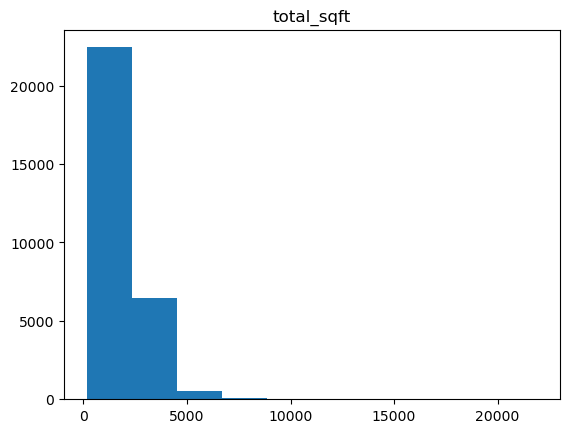

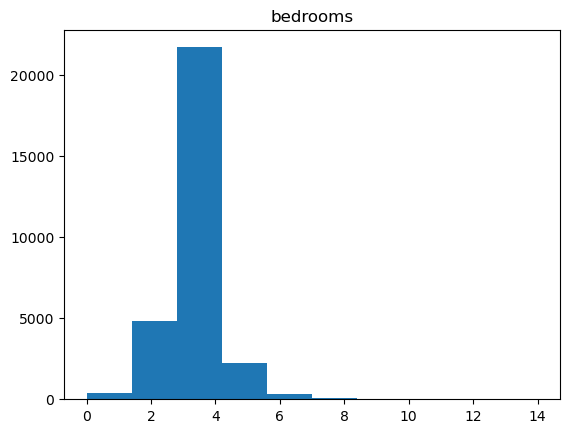

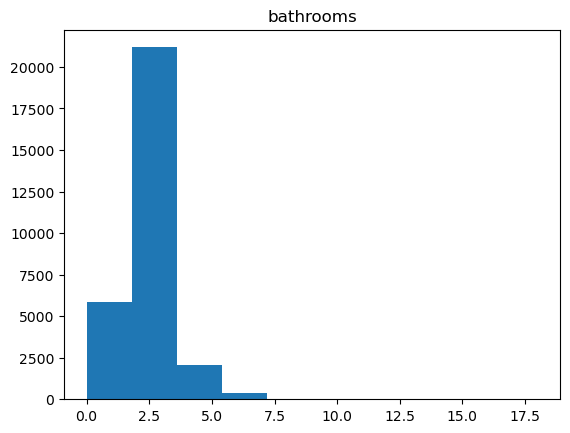

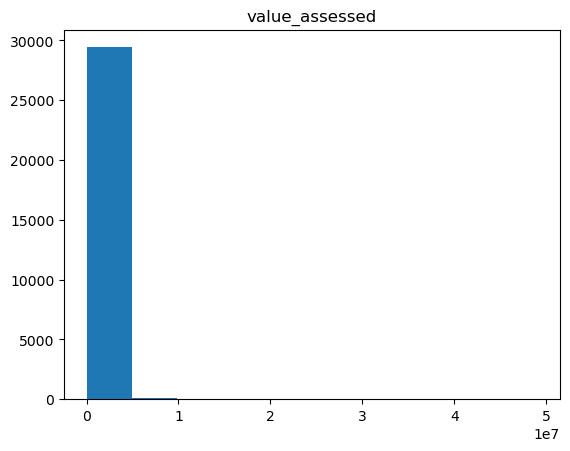

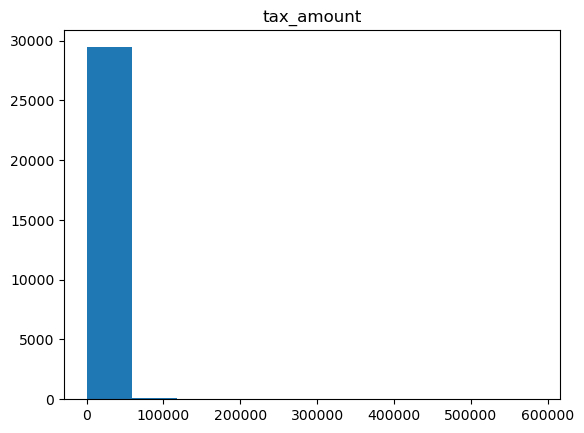

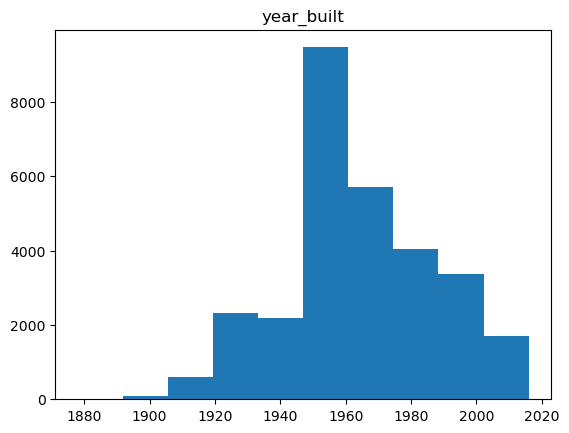

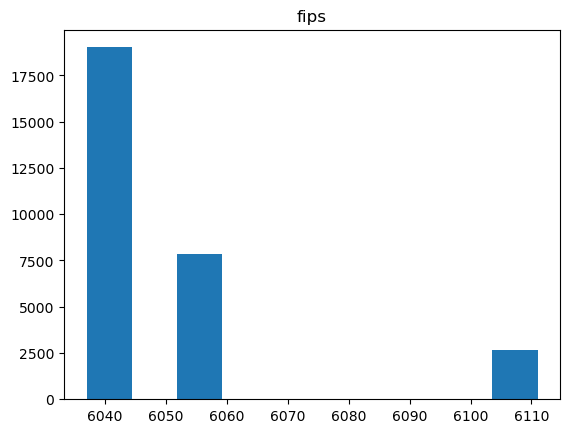

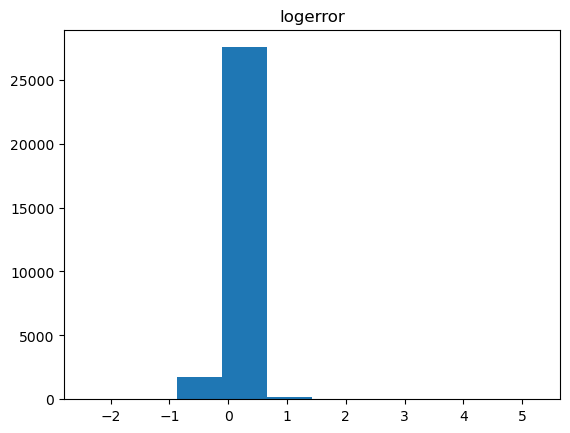

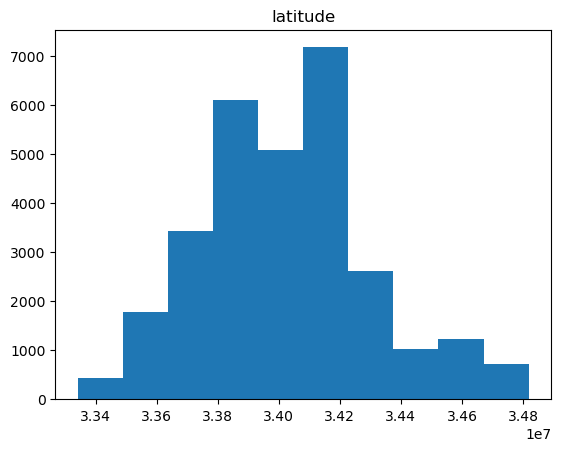

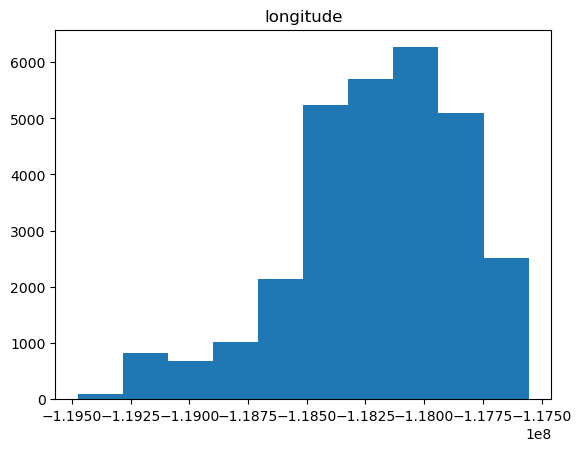

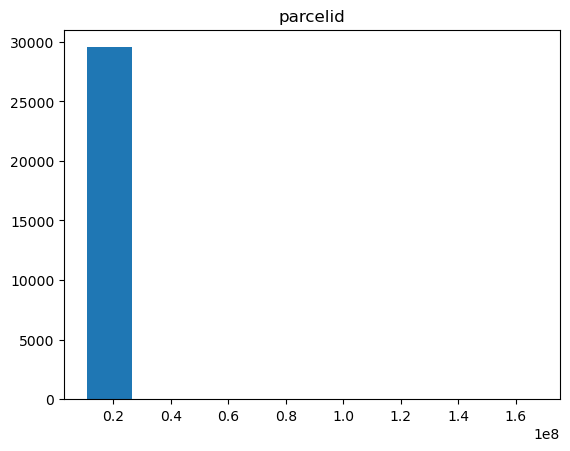

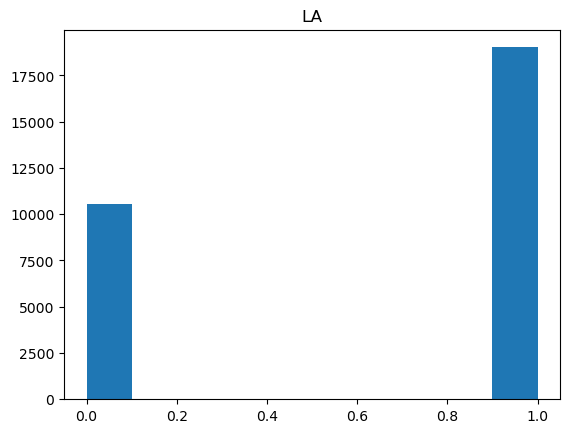

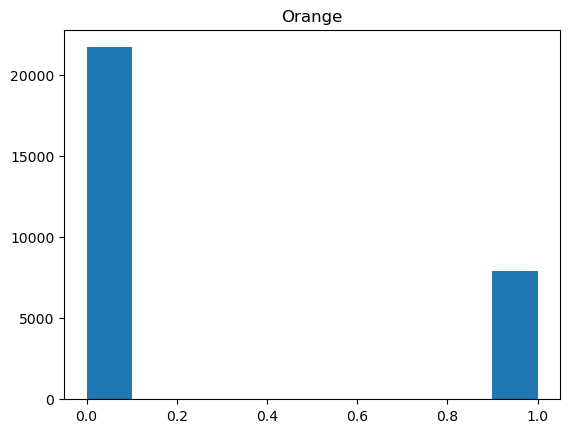

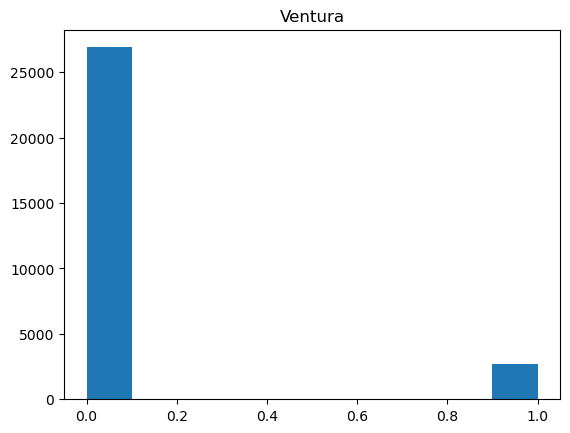

In [8]:
#look at all columns distribution
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

<hr style="border:0.5px solid black">

<b>B. Is the logerror significantly different for properties in LA County vs Orange County vs Ventura County </b>

Text(0.5, 1.0, 'logerror by county')

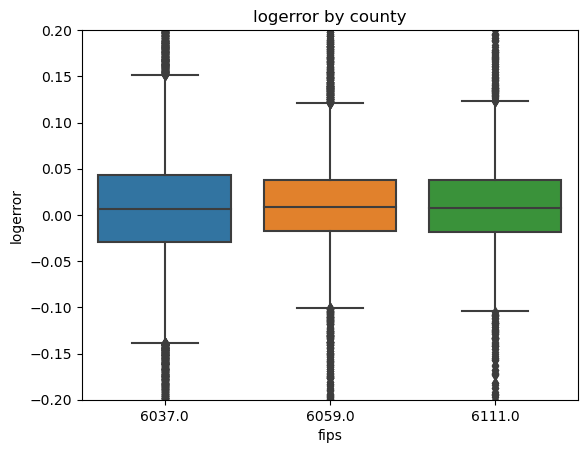

In [42]:
sns.boxplot(train.fips, train.logerror)
plt.ylim(-0.2, .2)
plt.title('logerror by county')

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>
    
- We might need to get rid of outliers
<br>
    
- LA seems to have a wider variance in logerror
<br>
    
- Levene : variance in logerror in Orange County (6059) and LA (6037)are equivalent
</div>

In [10]:
s, p = stats.levene(train[train.fips == 6059.0].logerror, train[train.fips == 6037.0].logerror)
s, p

(23.482281165432155, 1.267714298816779e-06)

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>
    
- Reject Levene H0, proceed with presumption of inequal variance
<br>

In [11]:
#2 tailed, T-Test
s, p = stats.ttest_ind(train[train.fips == 6037.0].logerror, train[train.fips == 6059.0].logerror, equal_var= False)
s, p

(-3.32450239126556, 0.0008881824049579871)

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>
    
- There is a significance in location
<br>

<hr style="border:0.5px solid black">

<b>C. Is there a relationship between logerror and total sqft of the property? </b>

Relationship between Sqft and Logerror?


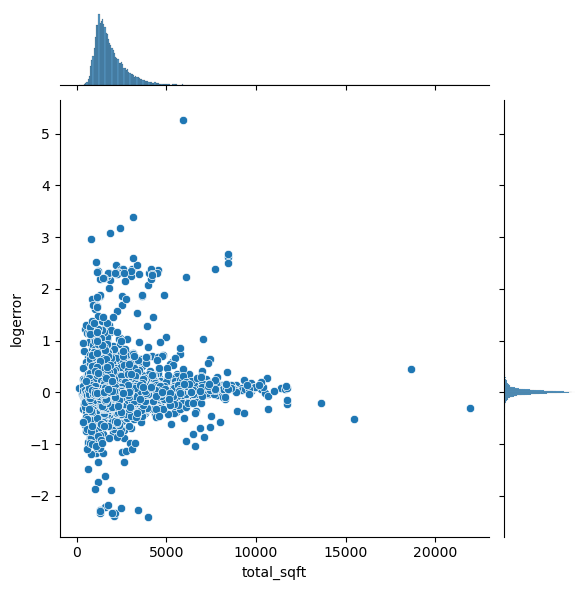

In [12]:
print('Relationship between Sqft and Logerror?')
sns.jointplot(x="total_sqft", y="logerror", data=train)
plt.xlabel("Total Square Feet")
plt.ylabel("Log Error")
plt.show()

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>
    
- There do not appear to be any distinct clusters.
<br>
    
- We might want to go back and remove outliers
<br>

<hr style="border:0.5px solid black">

<b>D. Is there a relationship between latitude and logitude </b>

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29556 entries, 6022 to 7161
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_sqft      29556 non-null  float64
 1   bedrooms        29556 non-null  float64
 2   bathrooms       29556 non-null  float64
 3   value_assessed  29556 non-null  float64
 4   tax_amount      29556 non-null  float64
 5   year_built      29556 non-null  float64
 6   fips            29556 non-null  float64
 7   logerror        29556 non-null  float64
 8   latitude        29556 non-null  float64
 9   longitude       29556 non-null  float64
 10  parcelid        29556 non-null  int64  
 11  LA              29556 non-null  uint8  
 12  Orange          29556 non-null  uint8  
 13  Ventura         29556 non-null  uint8  
dtypes: float64(10), int64(1), uint8(3)
memory usage: 2.8 MB


Relationship between Bedroom count and Logerror?


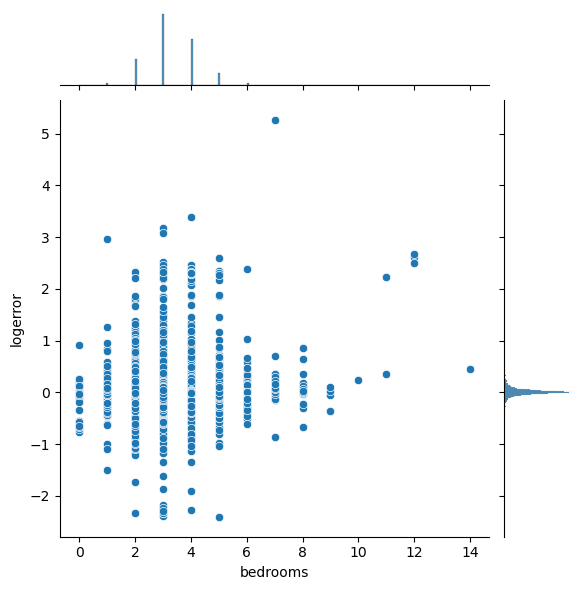

In [14]:
#take a look at bedrooms too
print('Relationship between Bedroom count and Logerror?')
sns.jointplot(x="bedrooms", y="logerror", data=train)
plt.xlabel("Total Bedrooms")
plt.ylabel("Log Error")
plt.show()

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>
    
- Levene H0: Variance in logerror for homes in 5 or less bedrooms is equal to those with more than 5 bedrooms
<br>

In [15]:
s, p = stats.levene(train[train.bedrooms >5].logerror, train[train.bedrooms<=5].logerror)
s, p

(63.767763295650155, 1.4503250651619146e-15)

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>

- presume equal variance. 
<br>

- We cannot reject the H0
</div>

In [17]:
s, p = stats.ttest_ind(train[train.bedrooms >5].logerror, train[train.bedrooms<=5].logerror, equal_var=True)
s, p

(7.951426618529654, 1.9091028820959727e-15)

<div class="alert alert-block alert-success">
<b>Takeaways :</b>
<br>

- Reject the H0 : there is a significant difference in the mean logerror in homes with 5 or bedrooms compared to those with less
<br>
    
- We might want to go back and remove outliers
<br>

<hr style="border:0.5px solid black">

<b>E. Accounting for bedroom counts, is there a relationship between logerror and lat/long.</b>

In [18]:
train['abs_logerr'] = train.logerror.apply(lambda x:x if x>=0 else -x)

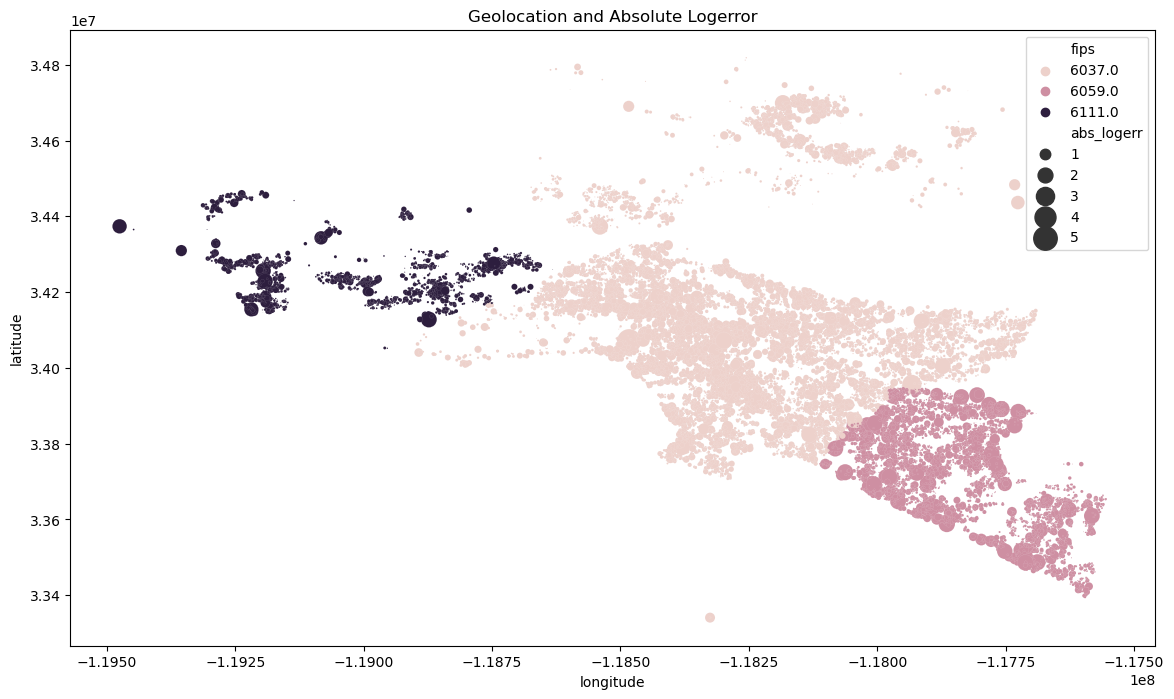

In [19]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue= 'fips', size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

In [22]:
train['bedroom_bin'] = pd.cut(train.bedrooms, [0,4,10])

In [23]:
train.bedroom_bin.value_counts()

(0, 4]     26860
(4, 10]     2642
Name: bedroom_bin, dtype: int64

In [25]:
train[train.bedrooms <=4].shape

(26908, 16)

<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

## Bonus:
Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [34]:
fips_with_significantly_different_errors=[]

In [35]:
fips_with_significantly_different_errors

[]

In [28]:
#Let's take a look at the unique fips that we have
zipcodes=train.fips.unique()

#call our variable
zipcodes

array([6037., 6059., 6111.])

In [30]:
#one sample T-Test (each county to overall error)
population_logerror_mean = train.logerror.mean() #<-- overall mean
population_logerror_mean

0.018782217159729445

In [37]:
#create loop to do T-Test
for zipc in zipcodes:
    #1sample t-test
    t, p = stats.ttest_1samp(train[train.fips == zip].logerror, population_logerror_mean)
    #set alpha
    if p <0.05:
        fips_with_significantly_different_errors.append(zipcodes)

In [38]:
#this shows with fips have different log errors
fips_with_significantly_different_errors

[]